# **Feed Forward Neural Network- Classification**

## **Binary Classification**

In [2]:
# Import the libraries 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the tips dataset
tips = sns.load_dataset('tips')

# Preprocess the data 
# Encoding categories 
le=LabelEncoder()
tips['sex']=le.fit_transform(tips['sex'])
tips['smoker']=le.fit_transform(tips['smoker'])
tips['day']=le.fit_transform(tips['day'])
tips['time']=le.fit_transform(tips['time'])

# Create a binary target variable for binary classification 
median_bill=tips['total_bill'].median()
tips['high_bill']=(tips['total_bill']>median_bill).astype(int)

# Split the data into training and test sets 
X=tips.drop(['total_bill', 'high_bill'], axis=1)
y=tips['high_bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the nueral network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy= model.evaluate(X_test, y_test)
print('Test Accuracy:%.2f'%(accuracy*100))



Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.8477 - accuracy: 0.3333
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8232 - accuracy: 0.3385
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8027 - accuracy: 0.3692
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7840 - accuracy: 0.4000
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7681 - accuracy: 0.4051
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.4103
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7362 - accuracy: 0.4205
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7240 - accuracy: 0.4718
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.5077
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.5333
Epoch 11/100
7/7 [===========

## **Multiclass Classification**

In [4]:
# Import the libraries 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the tips dataset
tips = sns.load_dataset('tips')

# Preprocess the data 
# Encoding categories 
le=LabelEncoder()
tips['sex']=le.fit_transform(tips['sex'])
tips['smoker']=le.fit_transform(tips['smoker'])
tips['day']=le.fit_transform(tips['day'])
tips['time']=le.fit_transform(tips['time'])

# Split the data into training and target variables 
X=tips.drop(['day'], axis=1)
y=tips['day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
# Build the nueral network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.unique().shape[0], activation='softmax') # y_train.unique in tips data Sunday/Mon..4
])
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy= model.evaluate(X_test, y_test)
print('Test Accuracy:%.2f'%(accuracy*100))


Epoch 1/10
5/5 [==============================] - 1s 62ms/step - loss: 1.4172 - accuracy: 0.1859 - val_loss: 1.3207 - val_accuracy: 0.3590
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 1.3516 - accuracy: 0.2308 - val_loss: 1.2715 - val_accuracy: 0.4103
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 1.2981 - accuracy: 0.3782 - val_loss: 1.2261 - val_accuracy: 0.5128
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 1.2476 - accuracy: 0.4872 - val_loss: 1.1855 - val_accuracy: 0.5641
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 1.2043 - accuracy: 0.5192 - val_loss: 1.1499 - val_accuracy: 0.5641
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 1.1638 - accuracy: 0.5641 - val_loss: 1.1179 - val_accuracy: 0.5641
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 1.1255 - accuracy: 0.5769 - val_loss: 1.0866 - val_accuracy: 0.5897
Epoch 8/10
5/5 [===========

Epoch 1/50
5/5 [==============================] - 0s 45ms/step - loss: 0.7923 - accuracy: 0.6731 - val_loss: 0.8210 - val_accuracy: 0.6923
Epoch 2/50
5/5 [==============================] - 0s 27ms/step - loss: 0.7775 - accuracy: 0.6731 - val_loss: 0.8155 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 0s 24ms/step - loss: 0.7641 - accuracy: 0.6795 - val_loss: 0.8082 - val_accuracy: 0.6667
Epoch 4/50
5/5 [==============================] - 0s 25ms/step - loss: 0.7525 - accuracy: 0.6731 - val_loss: 0.8015 - val_accuracy: 0.6667
Epoch 5/50
5/5 [==============================] - 0s 25ms/step - loss: 0.7416 - accuracy: 0.6667 - val_loss: 0.7986 - val_accuracy: 0.6667
Epoch 6/50
5/5 [==============================] - 0s 24ms/step - loss: 0.7315 - accuracy: 0.6795 - val_loss: 0.7949 - val_accuracy: 0.6667
Epoch 7/50
5/5 [==============================] - 0s 26ms/step - loss: 0.7224 - accuracy: 0.6923 - val_loss: 0.7926 - val_accuracy: 0.6667
Epoch 8/50
5/5 [===========

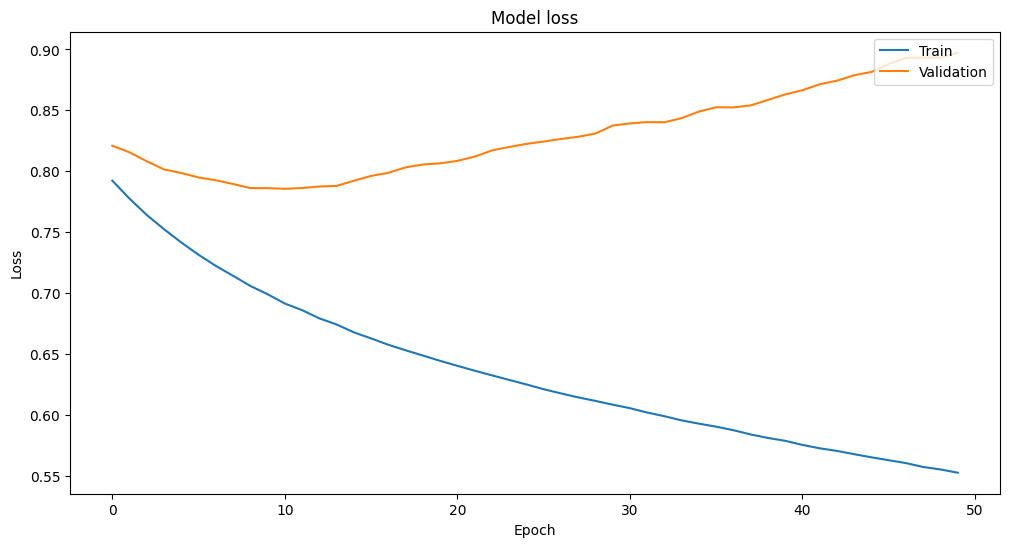

In [6]:
import matplotlib.pyplot as plt 
# Train the model and store the history 
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training and validation loss values 
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [9]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical on-hot encoding 
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

# compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Then use these one-hot encoded labels for training and evaluation 
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model 
loss, accuracy= model.evaluate(X_test, y_test_one_hot)
print(f' Accuracy: {accuracy*100}')

Epoch 1/10
5/5 [==============================] - 1s 55ms/step - loss: 0.5178 - accuracy: 0.7692 - val_loss: 0.9773 - val_accuracy: 0.6154
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.5116 - accuracy: 0.7756 - val_loss: 0.9786 - val_accuracy: 0.5897
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 0.5098 - accuracy: 0.7756 - val_loss: 0.9845 - val_accuracy: 0.5897
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.5072 - accuracy: 0.7756 - val_loss: 0.9907 - val_accuracy: 0.5897
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5050 - accuracy: 0.7756 - val_loss: 0.9895 - val_accuracy: 0.5897
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.5047 - accuracy: 0.7756 - val_loss: 0.9906 - val_accuracy: 0.5897
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.5022 - accuracy: 0.7692 - val_loss: 0.9973 - val_accuracy: 0.6154
Epoch 8/10
5/5 [===========

Epoch 1/50
5/5 [==============================] - 0s 23ms/step - loss: 0.4960 - accuracy: 0.7821 - val_loss: 1.0158 - val_accuracy: 0.5897
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4944 - accuracy: 0.7756 - val_loss: 1.0194 - val_accuracy: 0.6154
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4929 - accuracy: 0.7756 - val_loss: 1.0203 - val_accuracy: 0.5897
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 0.4907 - accuracy: 0.7821 - val_loss: 1.0227 - val_accuracy: 0.5897
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 0.4894 - accuracy: 0.7821 - val_loss: 1.0263 - val_accuracy: 0.5897
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.4872 - accuracy: 0.7821 - val_loss: 1.0302 - val_accuracy: 0.5897
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4871 - accuracy: 0.7821 - val_loss: 1.0326 - val_accuracy: 0.5897
Epoch 8/50
5/5 [===========

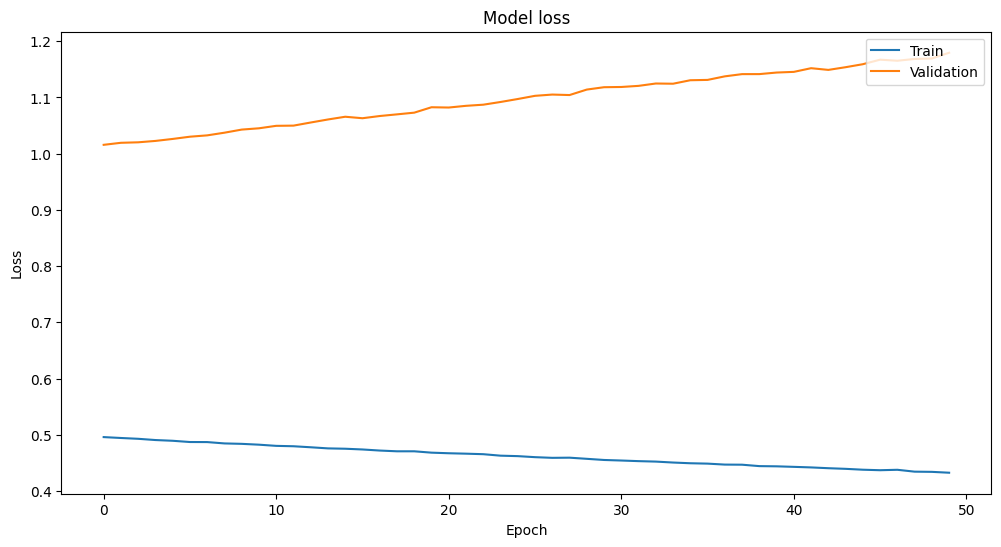

In [11]:
import matplotlib.pyplot as plt 
# Train the model and store the history 
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)

# Plot training and validation loss values
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()